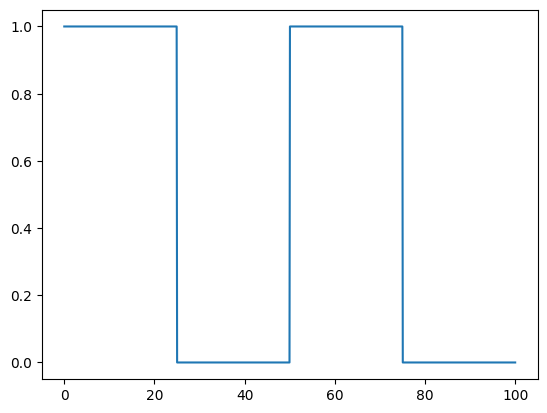

In [1]:
from matplotlib import pyplot as plt
import numpy as np

#Initialisation d'une séquence créneau
N=1000 #Nb d'échantillons
N0 = 500 #Période d'échantillon
alpha = 0.5 #Rapport cyclique

motif = np.concatenate([np.ones(int(N0*alpha)), np.zeros(int(N0*(1-alpha)))])
x_amp = np.tile(motif, int(N/N0)) #on duplique le motif

plt.plot(np.linspace(0,100,N), x_amp)



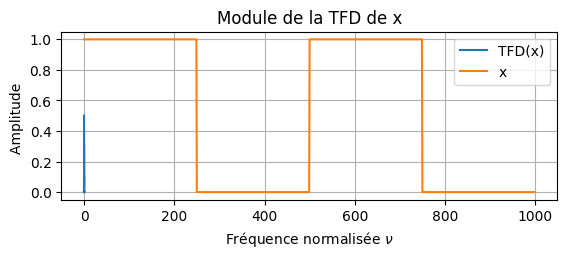

In [2]:
#Fonction dft :
import scipy.fft as fft

def dft (seq):
    N = len(seq)
    Seq = 1/N*fft.fft(seq)
    nu = fft.fftfreq(N)
    return Seq, nu

#TFD de x :
X,nu = dft(x_amp)
plt.figure(1)
plt.subplot(2,1,1)
plt.plot(nu, np.abs(X), label='TFD(x)')
plt.plot(np.arange(0, len(x_amp)),x_amp, label="x")
plt.title("Module de la TFD de x")
plt.xlabel(r"Fréquence normalisée $\nu$")
plt.ylabel("Amplitude ")
plt.legend()
plt.grid(True)
plt.show()





In [3]:
from scipy.signal import lfilter, freqz
import scipy.io as sio

#Filtrage d'une séquence
data = sio.loadmat("/Sources/TNS-Sources TDM-20250402/TDM.mat")

#On a les 3 filtres suivants :
Hza_num = data['Hza_num'].flatten()
Hza_den = data['Hza_den'].flatten()
print(Hza_den[0])


#Genre:
if len(Hza_den) == 1 and Hza_den[0] == 1:
    print("FIR")
else:
    print("IIR")

#Type : On regarde l'allure
w, h = freqz(Hza_num, Hza_den)
plt.plot(w / np.pi, 20 * np.log10(abs(h)))
plt.title("Réponse ya en fréquence (dB)")
plt.xlabel("Fréquence normalisée (×π rad/ech)")
plt.ylabel("Gain (dB)")
plt.grid()
plt.show()

#Ordre :
ordre_filtreA = max(len(Hza_num), len(Hza_den)) - 1



Hzb_num = data['Hzb_num'].flatten()
Hzb_den = data['Hzb_den'].flatten()
#Genre:
if len(Hzb_den) == 1 and Hzb_den[0] == 1:
    print("FIR")
else:
    print("IIR")

#Type : On regarde l'allure
w, h = freqz(Hzb_num, Hzb_den)
plt.plot(w / np.pi, 20 * np.log10(abs(h)))
plt.title("Réponse yb en fréquence (dB)")
plt.xlabel("Fréquence normalisée (×π rad/ech)")
plt.ylabel("Gain (dB)")
plt.grid()
plt.show()

#Ordre :
ordre_filtreB = max(len(Hzb_num), len(Hzb_den)) - 1

Hzc_num = data['Hzc_num'].flatten()
Hzc_den = data['Hzc_den'].flatten()
#Genre:
if len(Hzc_den) == 1 and Hzc_den[0] == 1:
    print("FIR")
else:
    print("IIR")

#Type : On regarde l'allure
w, h = freqz(Hzc_num, Hzc_den)
plt.plot(w / np.pi, 20 * np.log10(abs(h)))
plt.title("Réponse yc en fréquence (dB)")
plt.xlabel("Fréquence normalisée (×π rad/ech)")
plt.ylabel("Gain (dB)")
plt.grid()
plt.show()


#Ordre :
ordre_filtreC = max(len(Hzc_num), len(Hzc_den)) - 1

print(ordre_filtreA,ordre_filtreB,ordre_filtreC)

x=x_amp
ya = lfilter(Hza_num, Hza_den, x)
yb = lfilter(Hza_num, Hza_den, x)
yc = lfilter(Hza_num, Hza_den, x)

# Tracé temporel
plt.figure(figsize=(10, 3))
plt.plot(ya, label='ya')
plt.plot(yb, label='yb')
plt.plot(yc, label='yc')
plt.title("Tracés des séquences filtrées")
plt.legend()
plt.grid()

# TFD des sorties
def aft(sig):
    X = np.fft.fft(sig)
    nu = np.fft.fftfreq(len(sig), d=1)
    return X, nu

Xa, nua = aft(ya)
Xb, nub = aft(yb)
Xc, nuc = aft(yc)

plt.figure(figsize=(10, 3))
plt.plot(nua, np.abs(Xa), label='|Ya|')
plt.plot(nub, np.abs(Xb), label='|Yb|')
plt.plot(nuc, np.abs(Xc), label='|Yc|')
plt.xlim(0, 100)
plt.legend()
plt.title("Spectres fréquentiels des sorties")
plt.grid()
plt.show()

plt.figure(figsize=(10, 3))
plt.plot()





FileNotFoundError: [Errno 2] No such file or directory: '/Sources/TNS-Sources TDM-20250402/TDM.mat'